# Data Driven Dealings Development


*   EDA on Sales Data
*   RFM Clustering
*   Predicting Sales
*   Market Basket Analysis
*   Recommending Items per Customer







In [1]:
# To be able to use your data stored in your Google Drive you first need to mount your Google Drive so you can load and save files to it. 
from google.colab import drive
drive.mount('/content/gdrive')
#You'll need to put in a token which Google will generate for you as soon as you click on the link

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_excel('/content/gdrive/My Drive/DDDDFolder/DDDD.xlsx')
data.head()

,SalesDate,SalesValue,SalesAmount,Customer,SalesTransactionID,SalesItem
0,2018-09-28,8280.0,10,0,0,0
1,2018-09-28,7452.0,10,0,0,0
2,2019-04-23,21114.0,30,0,1,0
3,2019-04-23,7038.0,10,0,1,1
4,2019-04-23,7000.0,2,0,1,2


## Apriori


Association rules help us to identify the set of items that occur together frequently in sales transactions (market baskets). Apriori is an algorithm for frequent pattern mining that focuses on generating most frequent itemsets. 
Apriori generates candidate itemsets and has to scan them multiple times to check the support of each itemset. That is extremely computational expensive. 
That's the reason why will use the FP Growth algorithm in a second attempt.

A set of items is called frequent if it satisfies a minimum threshold value for support and confidence. Support shows transactions with items purchased together in a single transaction. Confidence shows transactions where the items are purchased one after the other.

For frequent itemset mining method, we consider only those transactions which meet minimum threshold support and confidence requirements. Insights from these mining algorithms offer a lot of benefits, cost-cutting and improved competitive advantage.

There is a tradeoff time taken to mine data and the volume of data for frequent mining. The frequent mining algorithm is an efficient algorithm to mine the hidden patterns of itemsets within a short time and less memory consumption.

In [3]:
df1 = data[['Customer','SalesTransactionID','SalesItem']]
df1.head()

,Customer,SalesTransactionID,SalesItem
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,1
4,0,1,2


In [4]:
df=df1.groupby ('SalesTransactionID') ['SalesItem']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('SalesTransactionID',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
items = (df[0].unique())
items

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.060e+02, 1.536e+03,
       3.750e+03])

In [6]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

       1.0     2.0     3.0     4.0     ...  3742.0  3745.0  3750.0  0.0   
0           0       0       0       0  ...       0       0       0       1
1           1       1       0       0  ...       0       0       0       1
2           1       0       0       0  ...       0       0       0       0
3           0       0       0       0  ...       0       0       0       1
4           0       0       0       0  ...       0       0       0       1
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
48421       0       0       0       0  ...       0       0       0       0
48422       0       0       0       0  ...       0       0       0       0
48423       0       0       0       0  ...       0       0       0       0
48424       0       0       0       0  ...       0       0       0       0
48425       0       0       0       0  ...       0       0       0       0

[48426 rows x 1549 columns]


In [7]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [11]:
freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.006732,(6.0)
1,0.021270,(7.0)
2,0.024326,(8.0)
3,0.021600,(9.0)
4,0.018812,(13.0)
...,...,...
1044,0.006174,"(312.0, 98.0, 104.0, 103.0)"
1045,0.007228,"(312.0, 98.0, 108.0, 103.0)"
1046,0.006422,"(312.0, 108.0, 98.0, 104.0)"
1047,0.006463,"(104.0, 108.0, 110.0, 103.0)"


In [9]:
freq_items.to_excel('Export&Supportvalues.xlsx')

In [12]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(8.0),(7.0),0.024326,0.021270,0.008095,0.332767,15.645237,0.007577,1.466850
1,(7.0),(8.0),0.021270,0.024326,0.008095,0.380583,15.645237,0.007577,1.575148
2,(20.0),(7.0),0.058584,0.021270,0.007062,0.120550,5.667717,0.005816,1.112889
3,(7.0),(20.0),0.021270,0.058584,0.007062,0.332039,5.667717,0.005816,1.409387
4,(83.0),(7.0),0.040784,0.021270,0.006422,0.157468,7.403459,0.005555,1.161654
...,...,...,...,...,...,...,...,...,...
2569,"(104.0, 103.0)","(312.0, 108.0)",0.018275,0.012597,0.006257,0.342373,27.179917,0.006027,1.501464
2570,(312.0),"(104.0, 108.0, 103.0)",0.021951,0.010346,0.006257,0.285042,27.551816,0.006030,1.384214
2571,(108.0),"(312.0, 104.0, 103.0)",0.034176,0.007124,0.006257,0.183082,25.698285,0.006013,1.215392
2572,(104.0),"(312.0, 108.0, 103.0)",0.049911,0.009107,0.006257,0.125362,13.765944,0.005802,1.132918


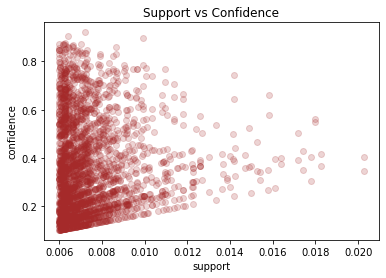

In [13]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

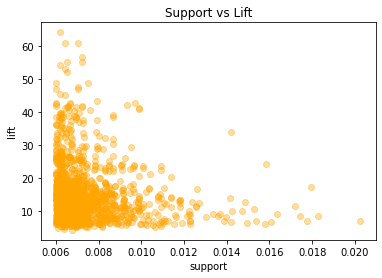

In [14]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

## Market Basket Analysis

In [15]:
%%capture
!sudo apt-get update --fix-missing

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
#pip install spark

In [16]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark   

In [ ]:
#files.upload()

In [17]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas


sparkdata = spark.createDataFrame(data)
basketdata = sparkdata.dropDuplicates(['SalesTransactionID', 'SalesItem']).sort('SalesTransactionID')
basketdata = basketdata.groupBy("SalesTransactionID").agg(F.collect_list("SalesItem")).sort('SalesTransactionID')

In [18]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(SalesItem)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(basketdata).show()
transformed = model.transform(basketdata)

+-------------------+----+
|              items|freq|
+-------------------+----+
|              [257]| 432|
|               [20]|2837|
|              [104]|2417|
|          [104, 20]| 981|
|             [1491]| 432|
|              [110]|2172|
|         [110, 104]| 745|
|     [110, 104, 20]| 476|
|          [110, 20]| 765|
|             [1495]| 431|
|              [103]|2123|
|         [103, 110]| 671|
|    [103, 110, 104]| 445|
|[103, 110, 104, 20]| 348|
|     [103, 110, 20]| 444|
|         [103, 104]| 885|
|     [103, 104, 20]| 572|
|          [103, 20]| 861|
|              [179]| 431|
|               [67]|1975|
+-------------------+----+
only showing top 20 rows

+------------+----------+-------------------+------------------+
|  antecedent|consequent|         confidence|              lift|
+------------+----------+-------------------+------------------+
|       [128]|      [67]| 0.3379978471474704|  8.28753607390552|
|       [128]|      [91]|0.34230355220667386|10.666918802548512|
|

In [19]:
# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[257],432
1,[20],2837
2,[104],2417
3,"[104, 20]",981
4,[1491],432


In [20]:
result_pdf.to_excel('result_pdfItemsFreq.xlsx')

In [21]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[128],[67],0.337998,8.287536
1,[128],[91],0.342304,10.666919
2,[128],[104],0.387513,7.764057
3,[128],[92],0.315393,9.648273
4,[128],[103],0.355221,8.102645


In [22]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')

In [23]:
transformed_pdf = transformed.select("*").toPandas()
transformed_pdf.head()

,SalesTransactionID,collect_list(SalesItem),prediction
0,0,[0],[]
1,1,"[0, 1, 2]",[]
2,2,[1],[]
3,3,[0],[]
4,4,[0],[]


In [24]:
transformed_pdf.to_excel('transformed_pdfSalesTransactionIDCollectListPred.xlsx')